In [15]:
# Import Dependencies
import pandas as pd
%matplotlib inline

import scipy.stats as stats

In [43]:
primary_csv = "primary_merge.csv"


In [44]:
primary_df = pd.read_csv(primary_csv)


In [45]:
primary_df.head()

,Unnamed: 0_x,Actors,Awards,BoxOffice,Country,DVD,Director,Episode,Error,Genre,...,imdbRating,imdbVotes,seriesID,totalSeasons,Unnamed: 0_y,id,imdbid,rating,title,year
0,0,"Charlize Theron, Christina Ricci, Bruce Dern, ...",Won 1 Oscar. Another 29 wins & 25 nominations.,"$34,187,787","Germany, USA",01 Jun 2004,Patty Jenkins,NaN,NaN,"Biography, Crime, Drama, Thriller",...,7.3,"123,001",NaN,NaN,3591,271,340855,3,Monster,2003
1,1,"Devon Alan, Laura Harris, Zooey Deschanel, Mar...",1 nomination.,NaN,"Canada, USA",NaN,Marcel Sarmiento,NaN,NaN,NaN,...,6.6,31,NaN,NaN,3592,3137,339882,1,It&#39;s Better to Be Wanted for Murder Than N...,2003
2,2,"Halle Berry, Robert Downey Jr., Charles S. Dut...",3 wins & 7 nominations.,"$59,537,388","USA, France, Canada, Spain",23 Mar 2004,Mathieu Kassovitz,NaN,NaN,"Horror, Mystery, Thriller",...,5.8,"99,552",NaN,NaN,3593,5360,348836,3,Gothika,2003
3,3,"Sean Connery, Naseeruddin Shah, Peta Wilson, T...",12 nominations.,"$66,327,144","USA, Germany, Czech Republic, UK",16 Dec 2003,Stephen Norrington,NaN,NaN,"Action, Adventure, Fantasy, Sci-Fi",...,5.8,"156,033",NaN,NaN,3594,2097,311429,0,"League of Extraordinary Gentlemen, The",2003
4,4,"Pamela Anderson, Jenny McCarthy, Marny Eng, Ch...",2 wins & 4 nominations.,NaN,"USA, Canada",11 May 2004,David Zucker,NaN,NaN,Comedy,...,5.5,"126,494",NaN,NaN,3595,325,306047,3,Scary Movie 3,2003


In [46]:
ratingsgroups = primary_df.groupby(['rating']).mean()
ratingsgroups

,Unnamed: 0_x,Episode,Error,Metascore,Response,Season,Unnamed: 0.1,imdbRating,totalSeasons,Unnamed: 0_y,id,imdbid,year
rating,,,,,,,,,,,,,
0,406.516484,7.500000,NaN,62.164921,True,1.833333,406.516484,6.832191,9.500000,3107.020757,4286.426129,7.969334e+05,1981.915751
1,451.346197,11.750000,NaN,60.233083,True,10.750000,451.346197,6.819237,2.250000,3924.786353,4188.715324,9.763344e+05,1995.862416
2,452.127893,6.500000,NaN,59.515748,True,1.500000,452.127893,6.725091,1.000000,3714.473812,4313.074300,9.887383e+05,1991.239951
3,453.301096,10.357143,NaN,59.689961,True,3.928571,453.301096,6.585859,2.907407,4297.648184,4307.520739,1.225213e+06,1998.748764


In [49]:
primary_df = primary_df[['rating','imdbRating', 'id']]

In [50]:
primary_df

,rating,imdbRating,id
0,3,7.3,271
1,1,6.6,3137
2,3,5.8,5360
3,0,5.8,2097
4,3,5.5,325
5,3,7.1,5422
6,1,5.7,3227
7,0,8.3,5430
8,3,6.7,2500
9,2,7.2,2521


In [52]:
primary_df.dropna(inplace=True)


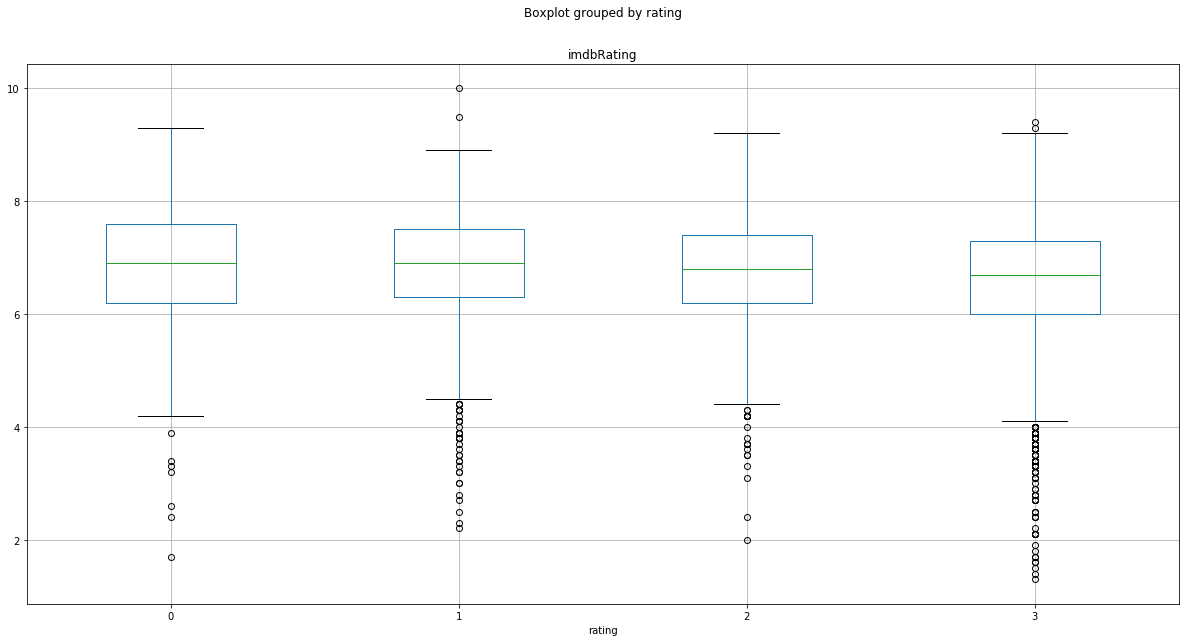

In [53]:
# Create a boxplot to compare means
primary_df.boxplot("imdbRating", by="rating", figsize=(20, 10))

In [54]:
group0 = primary_df[primary_df["rating"] == 0]["imdbRating"]
group1 = primary_df[primary_df["rating"] == 1]["imdbRating"]
group2 = primary_df[primary_df["rating"] == 2]["imdbRating"]
group3 = primary_df[primary_df["rating"] == 3]["imdbRating"]

In [55]:
stats.f_oneway(group0, group1, group2, group3)

F_onewayResult(statistic=31.539189630517413, pvalue=2.922297702448757e-20)

In [59]:
population1 = primary_df[primary_df["rating"] == 0]


In [60]:
population2 = primary_df[primary_df["rating"] == 3]

In [61]:
stats.ttest_ind(population1.imdbRating, population2.imdbRating, equal_var=False)

Ttest_indResult(statistic=6.401139830751714, pvalue=2.2475932827335373e-10)

In [69]:
population2.imdbRating.mean

<bound method Series.mean of 0       7.3
2       5.8
4       5.5
5       7.1
8       6.7
10      8.1
11      5.5
12      3.5
14      6.1
17      4.7
18      4.7
19      5.6
20      7.5
21      3.7
24      6.9
25      4.2
26      7.3
28      8.0
29      7.7
33      5.3
34      5.5
35      6.9
37      5.6
39      6.3
40      7.9
43      6.9
44      5.5
46      7.7
47      6.9
48      7.0
       ... 
8027    6.1
8028    6.6
8029    5.7
8031    6.5
8032    7.9
8034    6.0
8038    6.9
8041    5.6
8044    6.5
8045    7.1
8047    7.6
8049    8.4
8051    7.3
8052    6.1
8053    7.4
8056    5.9
8057    6.4
8060    6.4
8061    5.8
8062    6.1
8065    8.0
8066    7.1
8070    6.0
8071    8.0
8072    7.2
8074    5.6
8077    6.7
8078    7.4
8079    6.5
8080    4.2
Name: imdbRating, Length: 4639, dtype: float64>